# About Dataset

## Context
This dataset is created to practice various text classification techniques.

The text data is collected using praw API from reddit.com.

## Dataset details
Number of classes: 3 (Physics, Chemistry, and Biology)
Total number of data points: 10281 comments
The number of words in train comments ranges from 1 word to 1274 words
The number of words in test comments ranges from 26 words to 837 words

# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/NLP_분류_물리_화학_생물학/"    

train_df = pd.read_csv(base_path + "train.csv", encoding="utf-8" )
test_df = pd.read_csv(base_path + "test.csv",  encoding="utf-8")
# submission = pd.read_csv(base_path + "sample_submission.csv",  encoding="utf-8")

# EDA

In [ ]:
train_df

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [ ]:
test_df

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


# 결측치 제거

결과: 결측치 없음

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [ ]:
train_df.isna().sum() #Check for null values

Id         0
Comment    0
Topic      0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1586 non-null   object
 1   Comment  1586 non-null   object
 2   Topic    1586 non-null   object
dtypes: object(3)
memory usage: 37.3+ KB


# 중복 제거

결과: 중복 없음

In [ ]:
# 중복확인
train_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8690    False
8691    False
8692    False
8693    False
8694    False
Length: 8695, dtype: bool

In [ ]:
train_df.duplicated().sum() #check for the duplicated rows

0

In [ ]:
# 중복제거
train_df = train_df.drop_duplicates(subset=["Id", "Comment"])

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [ ]:
train_df.head(10).style.set_properties(**{"background-color": "#63B4B8","color": "black","border-color": "black"})  # **의 의미가 뭘까?

,Id,Comment,Topic
0,0x840,"A few things. You might have negative- frequency dependent selection going on where the least common phenotype, reflected by genotype, is going to have an advantage in the environment. For instance, if a prey animal such as a vole were to have a light and a dark phenotype, a predator might recognize the more common phenotype as food. So if the light voles are more common, foxes may be keeping a closer eye out for light phenotypic voles, recognising them as good prey. This would reduce the light causing alleles due to increased predation and the dark genotypes would increase their proportion of the population until this scenario is reversed. This cycle continues perpetually. \n\nHowever, this is unlikely to be strictly yearly as it usually takes more time than a year for an entire populations allele frequencies to change enough to make a large enough difference to alter fitness. \n\nMore likely on a *year to year* basis, the population is experiencing fluctuating selection where alternating conditions in the environment favor one genotype over another. Perhaps a plant species is living in an area that is flooded every other year and the two phenotypes in the population are plants that do much better in the dryer year and one that does better in the wet year. If there is no flooding, the dry-type genotype will have more fitness leading to more offspring and therefore more dry alleles in the population, however, in flooded years the wet-liking phenotype will do better and propagate the wet genes.",Biology
1,0xbf0,Is it so hard to believe that there exist particulars out that that we can't detect with anything we've invented so far.\n\nI mean look how long it took humans to find out a way to detect radiation.,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot of drugs on your liver. You probably won't die immediately you'll be fine. Take care of your self tho that's definitely not good for your body,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
5,0xb39,I meant that the question itself is unclear.,Chemistry
6,0x1f3d,Shove it up your ass and see what happens,Biology
7,0x531,"??? I mean it has some butter, but besides that it’s sugar, baking soda, and peanuts, so yeah…",Chemistry
8,0xe05,https://t.me/joinchat/3gElLHLuMCxhNGI0,Biology
9,0x2148,"Well, that’s just the thing. You can’t really induce an immune response against yourself by introducing a protein that’s already there.",Biology


In [ ]:
train_df.tail(10).style.set_properties(**{"background-color": "#63B4B8","color": "black","border-color": "black"})

,Id,Comment,Topic
8685,0xf74,Thank you for your kindness <3 Found this [injured dragon fly](https://news.yahoo.com/news/blogs/sideshow/handfeeding-injured-dragonfly-180758521.html),Biology
8686,0x1c7c,"Are you wanting this to be a ""peel off"" mask? If so, probably going to need the PVA.",Chemistry
8687,0x187,"Try to understand everything you do in the lab, as well as to not underestimate quality documentation",Chemistry
8688,0x133,"First off, matter can absolutely be created and destroyed. Just not at standard conditions. This is part of what high energy physics deals with. For example, there was a recent experiment at the LHC where photons (massless particles) were merged into bosons (massive particles).\n\nYou are asking about the [carbon cycle](https://en.wikipedia.org/wiki/Carbon_cycle). Inorganic carbon, in the form of carbon dioxide, is extracted from the environment, reduced and fixed into organic matter primarily through photosynthesis. Cells do this by harnessing an enthalpy gradient to lower entropy.\n\nIf you are asking where all the carbon on Earth comes from - it was generated in stars on the main sequence, from hydrogen, via [nucleosynthesis](https://en.wikipedia.org/wiki/Stellar_nucleosynthesis). We have a fixed and constant amount of carbon.",Chemistry
8689,0x262,"Thank You - If I assumed it was an electric heater, what would the formula be?\n\nYou are correct, and though this is a sealed propane fireplace, the 50,000BTU of the burner, looses 32% of it’s efficiency due to the chimney.\n\nAlso the reason for the question is I have a ‘new’ fireplace installed, that is higher BTU than the old, yet yields no heat. The manufacture and installer and distributer all were over today, filling the air with techno-garbo of why I should expect a 50,000 BTU fireplace to NOT HEAT A ROOM very well.\n\nI did the math 50,000x68%=34,000 BTU actual heat. Now to demonstrate the lack of heat, I converted this to Watts then showed a 1500watt electric heater was hotter than the fireplace. \n\nWhat I would like to show a theoretical heat transfer in temperature gain.\n\nThanks agin for the time",Physics
8690,0x1e02,"I make similar observations over the last weeks (southern Germany) \nWasps seem to crave for energy / sugar because natural resources are running out because of the season. I guess within some days or weeks, wasps will beginn to hibernate/ die and problem of overly active ones is solved.",Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaking technology, and future research in the field of genetic engineering. Is it safe? What are the strengths?. What are the benefits and whereare we headed? Amongst different cultural and spiritual dynamics, where do we draw the line when it comes to a want and a need? What risks are present and possible for the future of the field?",Biology
8694,0x1476,I would like to know too.,Biology


# 데이터 전처리

In [ ]:
train_df.dtypes #check the datatypes of dataset

Id         object
Comment    object
Topic      object
dtype: object

In [ ]:
train_df['Topic'].value_counts() #Different types of value in "Topic" column

Biology      3591
Chemistry    2920
Physics      2184
Name: Topic, dtype: int64

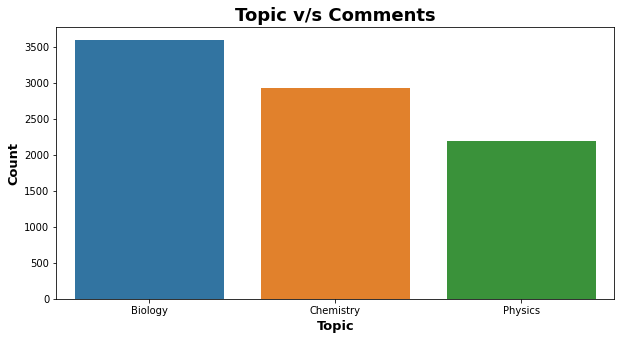

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = train_df['Topic'], order = train_df["Topic"].value_counts().index)
plt.title("Topic v/s Comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("Topic",fontsize = 13,fontweight = 'bold')
plt.ylabel("Count",fontsize=13,fontweight = 'bold')
plt.show()

In [ ]:
words_per_comments_train_df = train_df.Comment.map(lambda x : len(x.split()))

In [ ]:
words_per_comments_train_df

0       254
1        37
2         3
3        33
4         6
       ... 
8690     49
8691      3
8692      8
8693     64
8694      6
Name: Comment, Length: 8695, dtype: int64

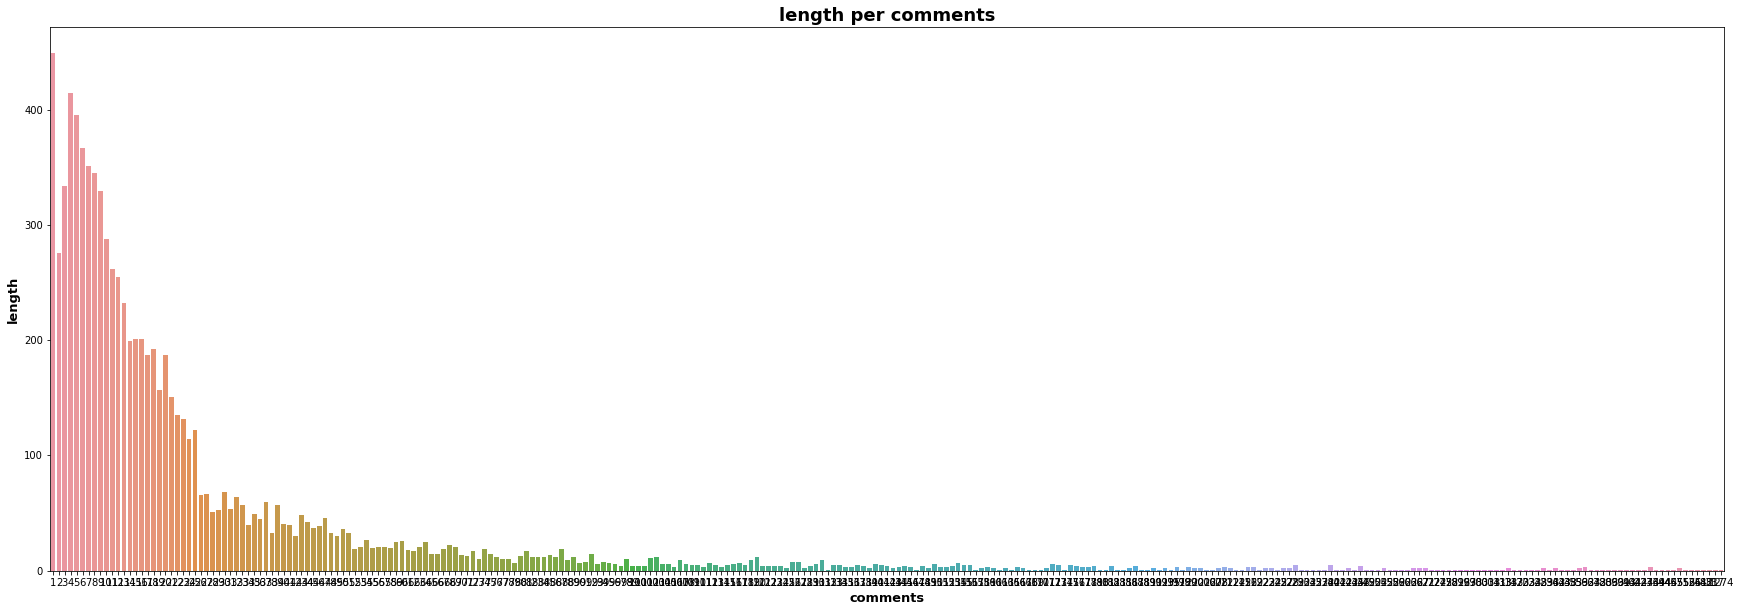

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x = words_per_comments_train_df)
plt.title("length per comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("comments",fontsize = 13,fontweight = 'bold')
plt.ylabel("length",fontsize=13,fontweight = 'bold')
plt.show()

<ipython-input-71-19b4a8867e91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(words_per_comments_train)


Text(0.5, 0, 'Word count')

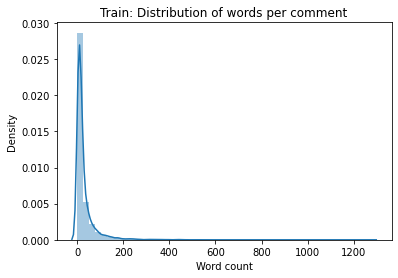

In [ ]:
sns.distplot(words_per_comments_train)
plt.title("Train: Distribution of words per comment")
plt.xlabel("Word count")

In [ ]:
min(words_per_comments_train),max(words_per_comments_train)

(1, 1274)

In [ ]:
words_per_comments_test_df = test_df.Comment.map(lambda x : len(x.split()))

In [ ]:
words_per_comments_test_df

0        52
1        34
2       148
3        34
4        58
       ... 
1581    186
1582     49
1583     60
1584     37
1585     33
Name: Comment, Length: 1586, dtype: int64

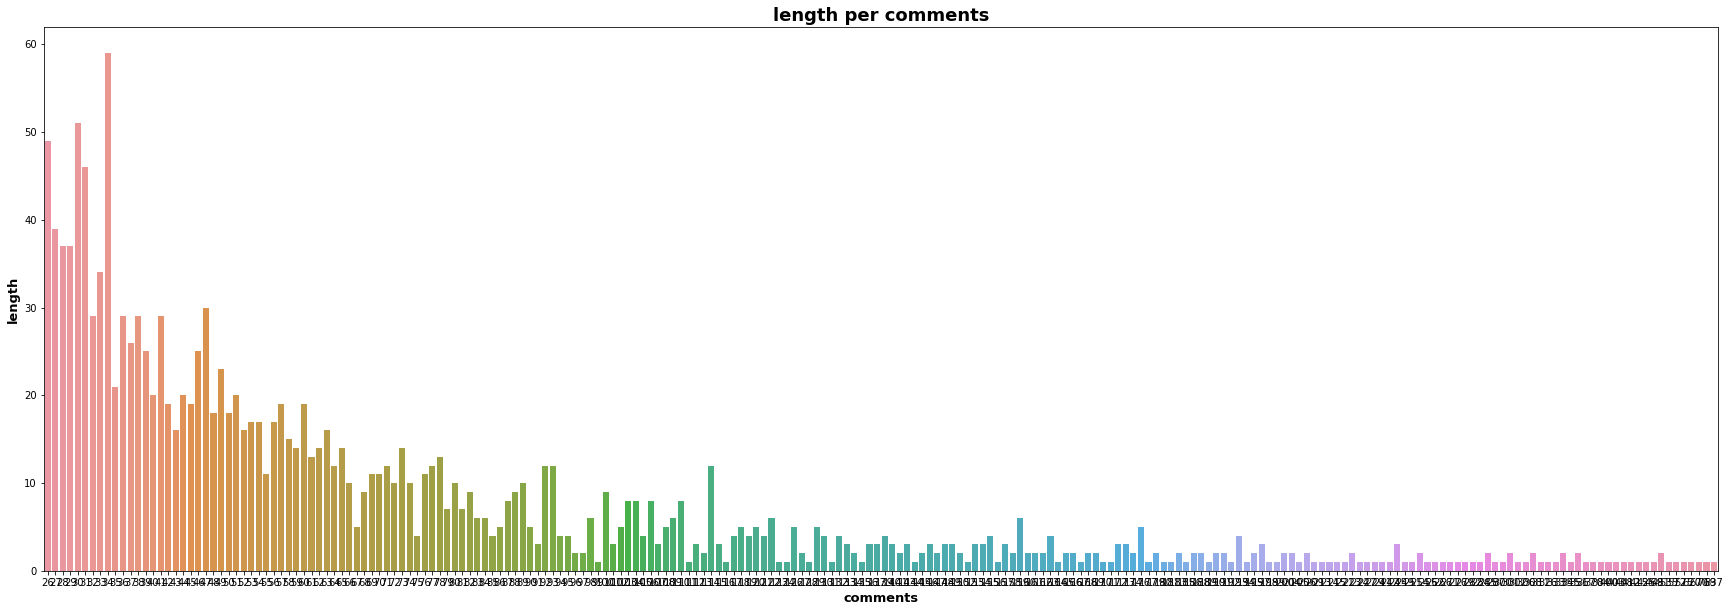

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x = words_per_comments_test_df)
plt.title("length per comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("comments",fontsize = 13,fontweight = 'bold')
plt.ylabel("length",fontsize=13,fontweight = 'bold')
plt.show()

<ipython-input-78-effcdcbf6dd5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(words_per_comments_test_df)


Text(0.5, 0, 'Word count')

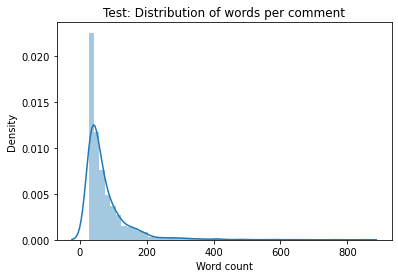

In [ ]:
sns.distplot(words_per_comments_test_df)
plt.title("Test: Distribution of words per comment")
plt.xlabel("Word count")

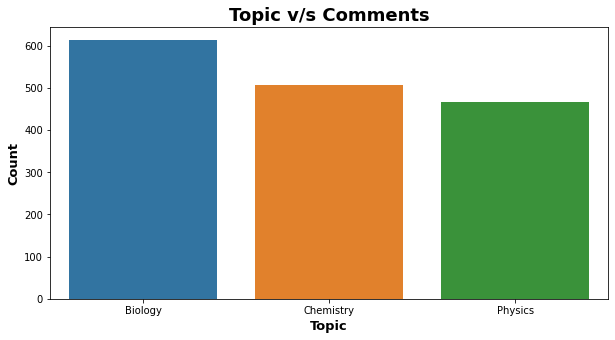

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = test_df['Topic'], order = train_df["Topic"].value_counts().index)
plt.title("Topic v/s Comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("Topic",fontsize = 13,fontweight = 'bold')
plt.ylabel("Count",fontsize=13,fontweight = 'bold')
plt.show()

# 머신러닝 모델

In [ ]:
# 머신러닝 모델
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Create the vectorizer 
tfi_df = TfidfVectorizer(stop_words='english')

# fit the vectorizer on train data
tfi_df.fit(train_df.Comment)

TfidfVectorizer(stop_words='english')

훈련 데이터 학습

In [ ]:
features = tfi_df.transform(train_df.Comment).toarray()
features.shape

(8695, 17888)

In [ ]:
label = train_df.Topic 

In [ ]:
clf = MultinomialNB()

In [ ]:
clf = clf.fit(features, label)

In [ ]:
test_actual = test_df.Topic

In [ ]:
test_features = tfi_df.transform(test_df.Comment).toarray()
test_features.shape

(1586, 17888)

테스트 데이터 실햄

In [ ]:
test_prediction = clf.predict(test_features)

In [ ]:
test_score = 100*(metrics.accuracy_score(test_actual , test_prediction ))

print(test_score)

81.84110970996217


여기까지 기본적인 머신러닝 실습 연습